In [1]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('mf_df_mapped.csv')

In [19]:
df = df.astype(int)

In [20]:
RANDOM_SEED = 42

In [21]:
target = 'DC201'

In [22]:
features = [x for x in df.columns if x not in target] ## Removing our target variable

In [23]:
# handling imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X, y = df[features], df[target]
print(Counter(y))

sm = SMOTE(random_state=RANDOM_SEED)
# rus = RandomUnderSampler(random_state=RANDOM_SEED)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Summarize new class distribution
print(Counter(y_resampled))

Counter({1: 32398, 0: 3572})
Counter({1: 32398, 0: 32398})


In [26]:
df_smoted = X_resampled.join(y_resampled)

In [ ]:
df_smoted.to_csv('mf_df_mapped_smoted.csv', index=False)

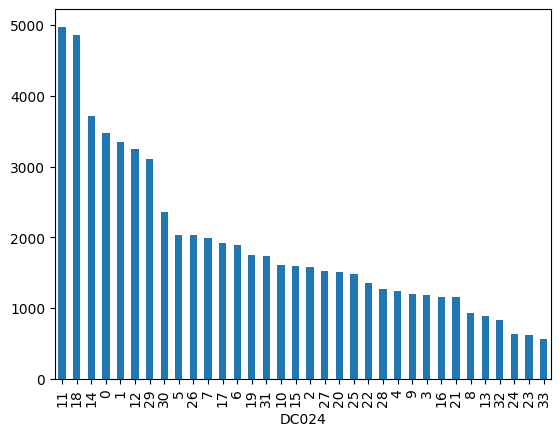

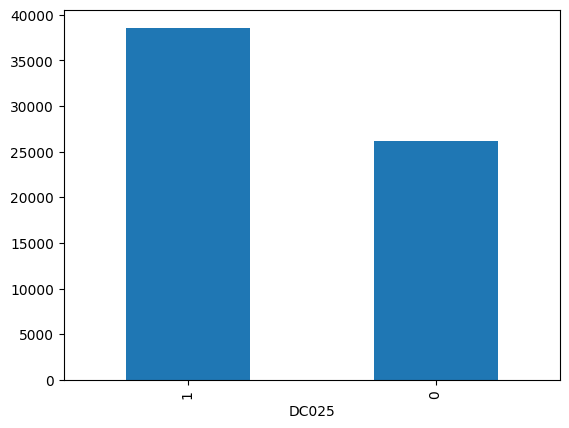

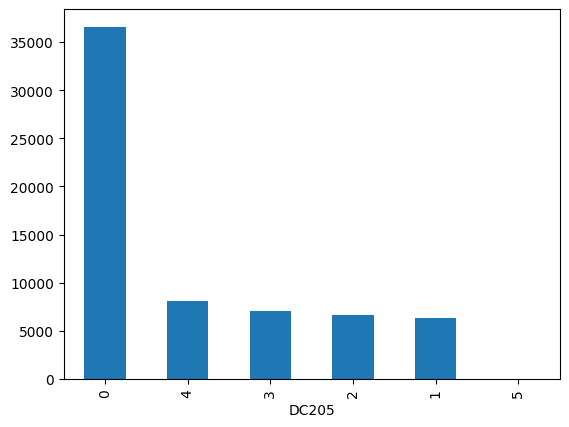

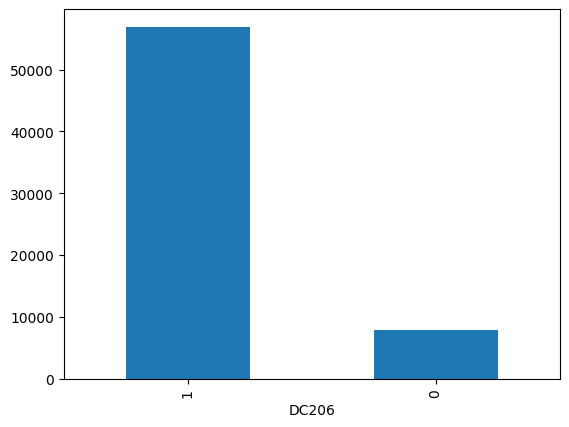

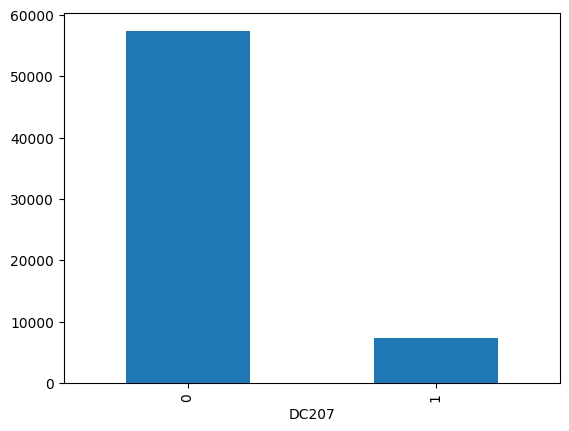

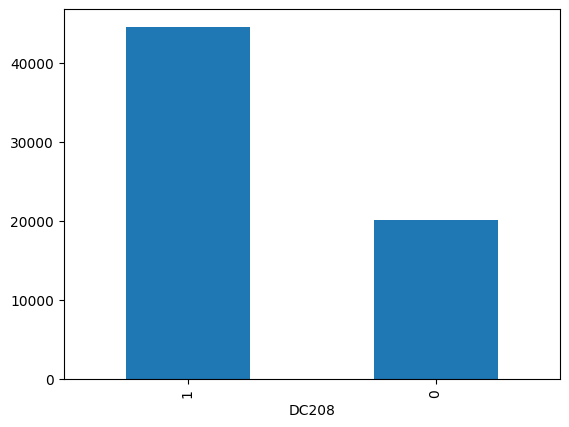

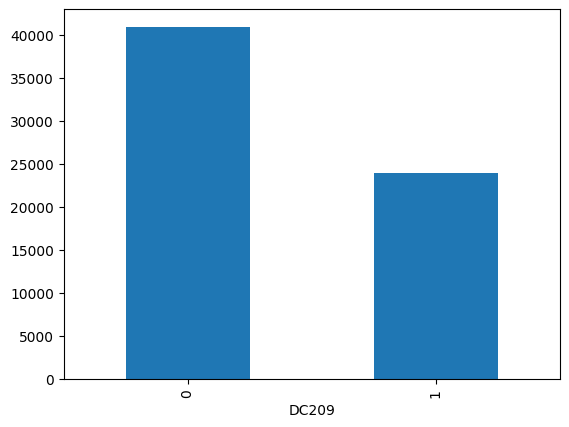

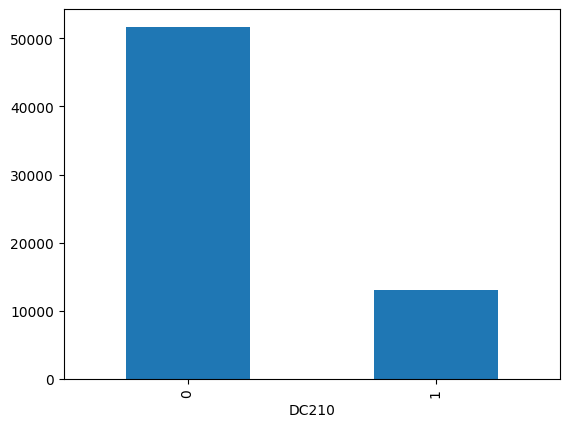

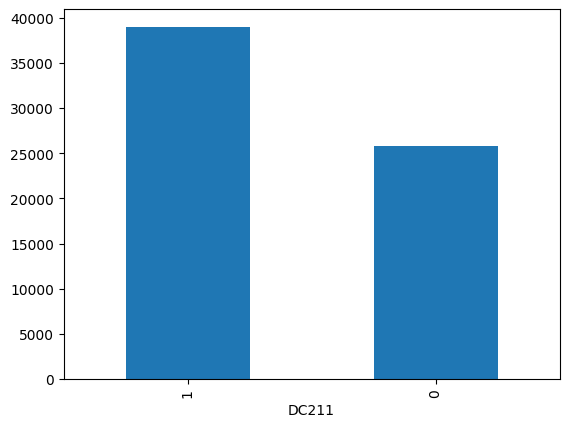

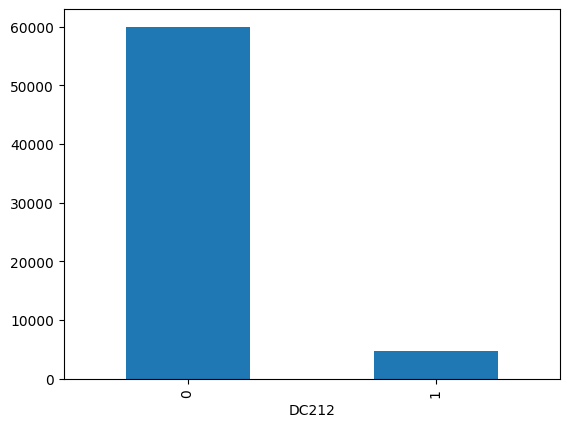

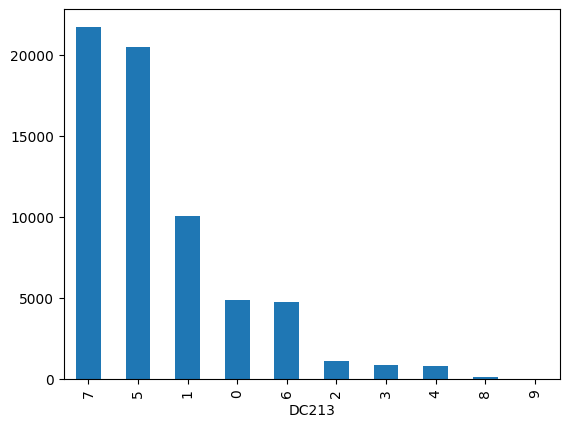

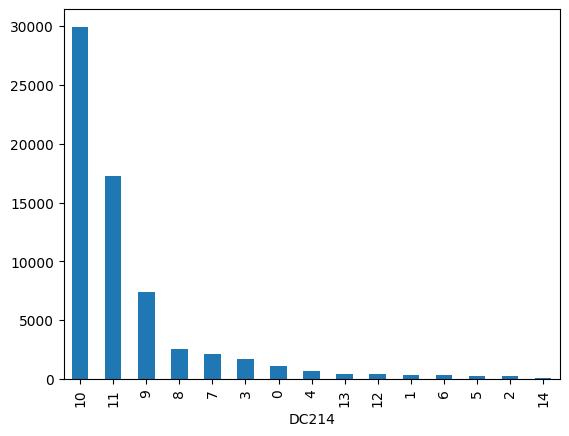

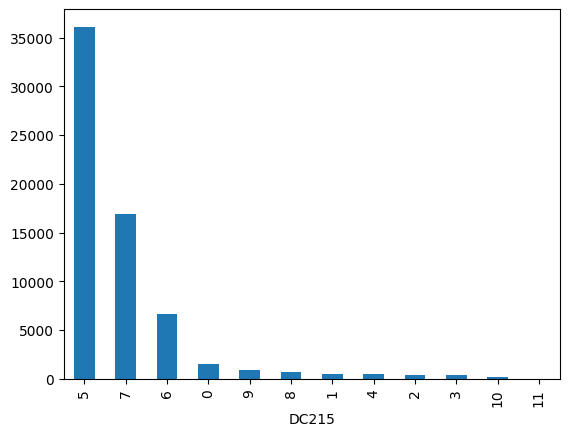

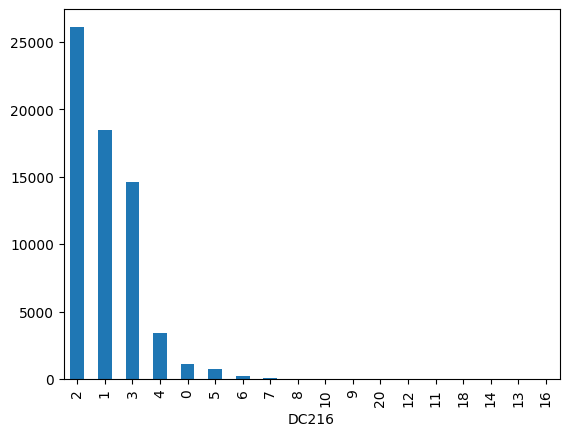

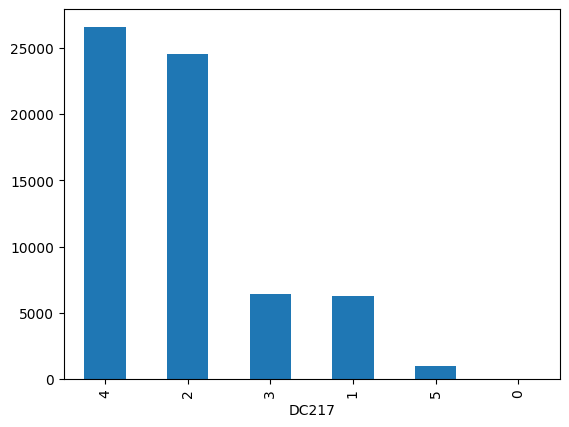

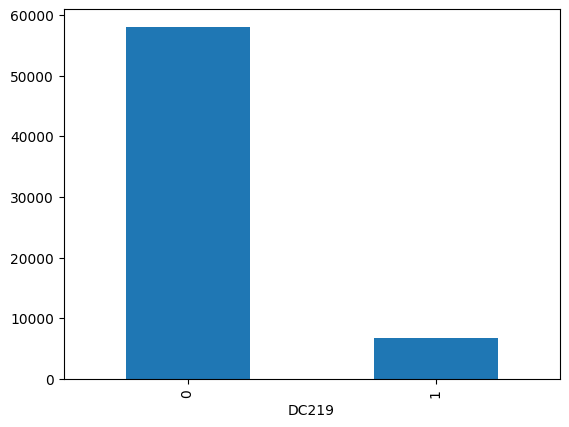

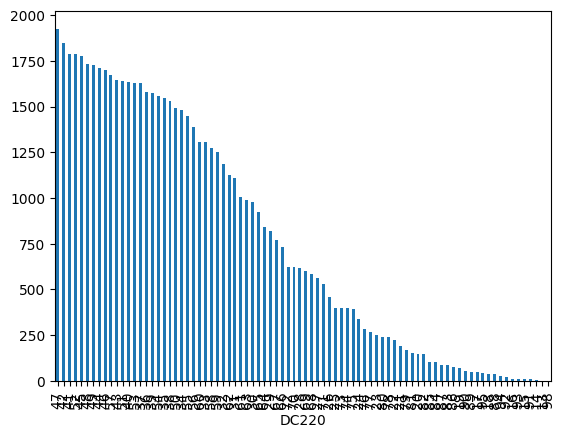

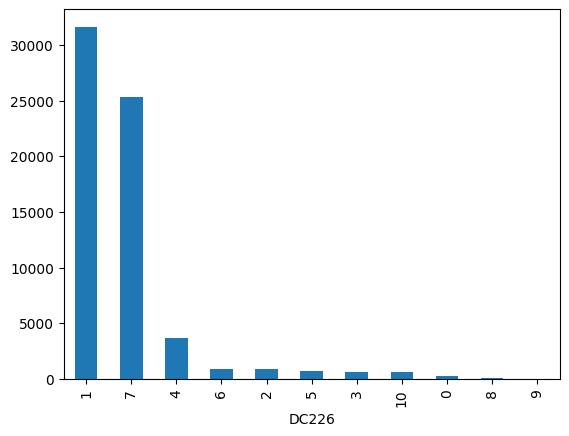

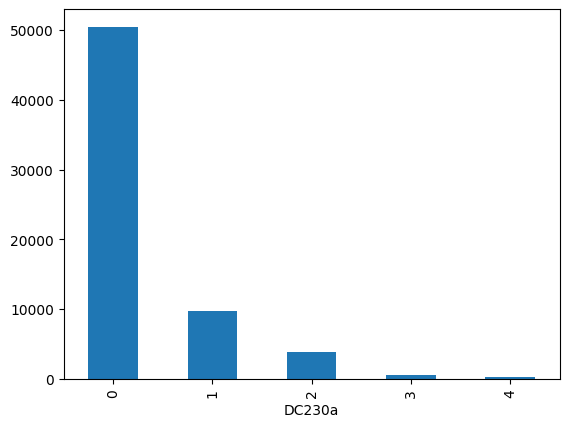

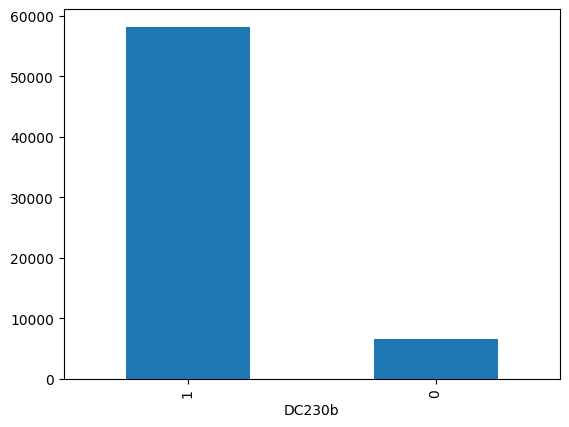

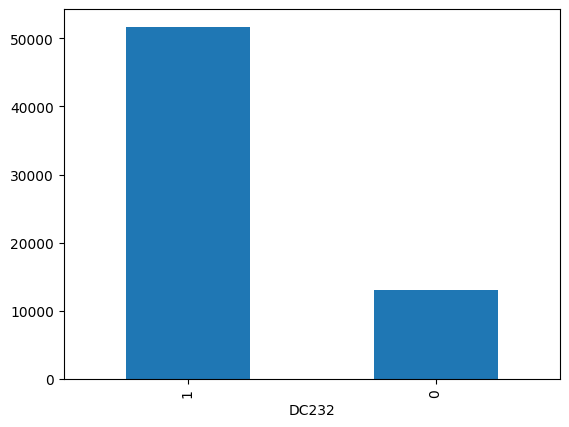

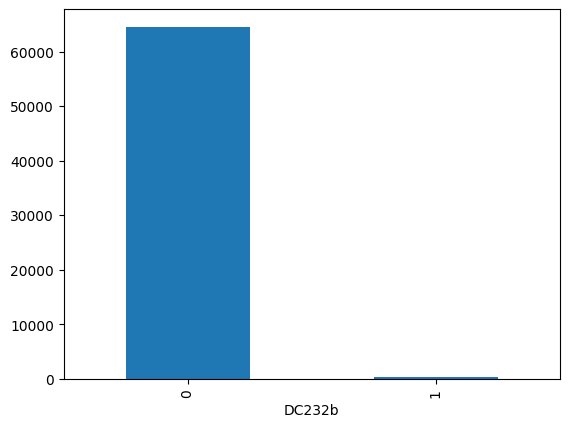

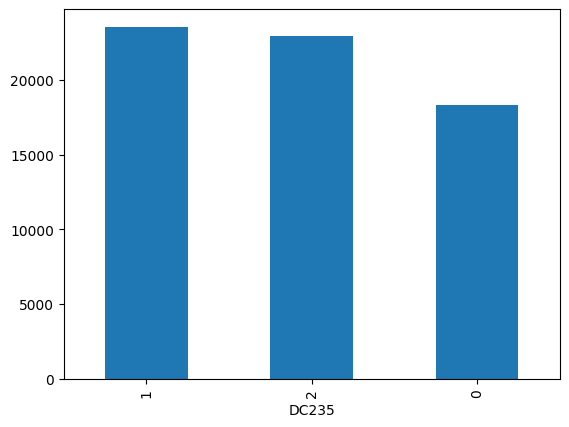

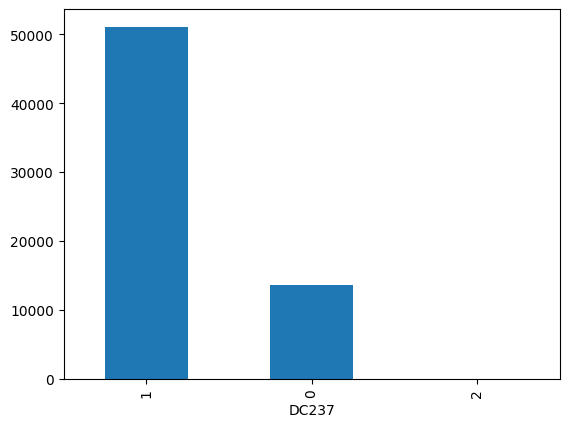

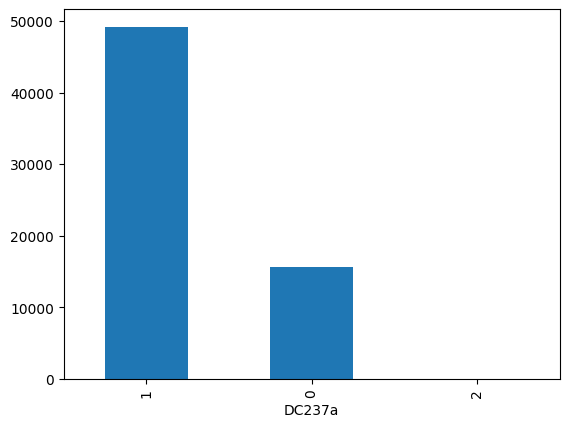

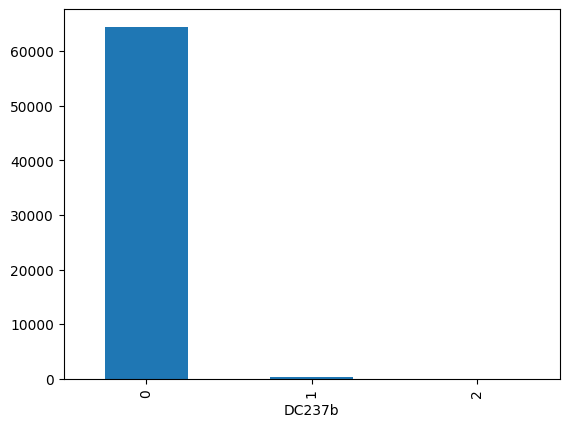

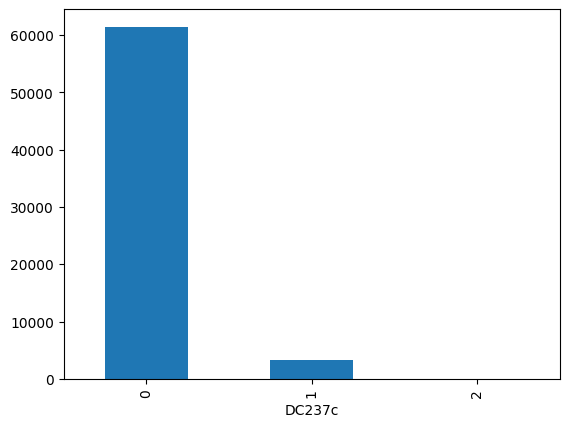

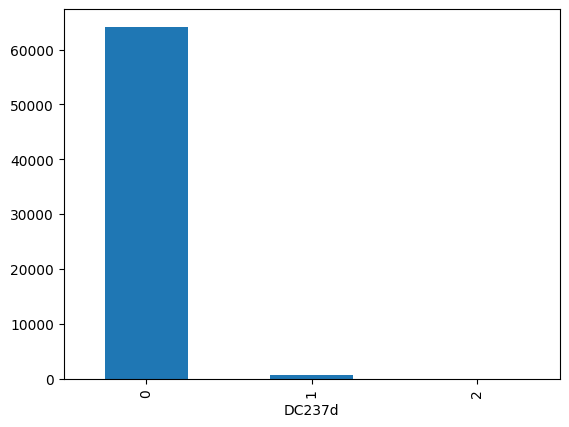

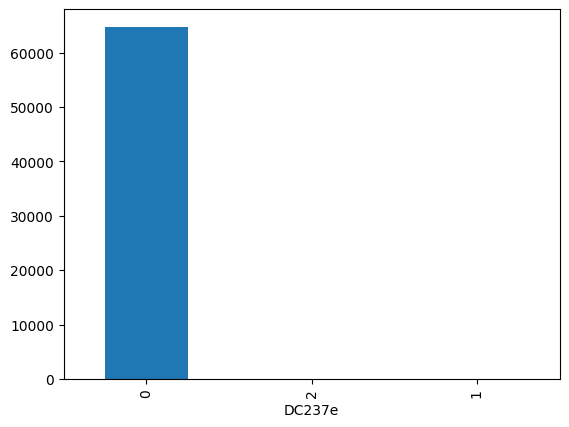

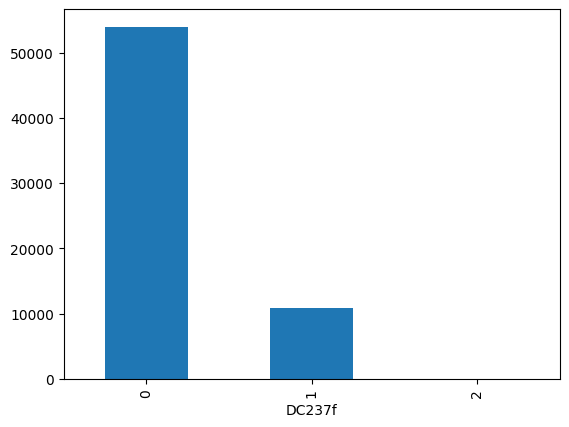

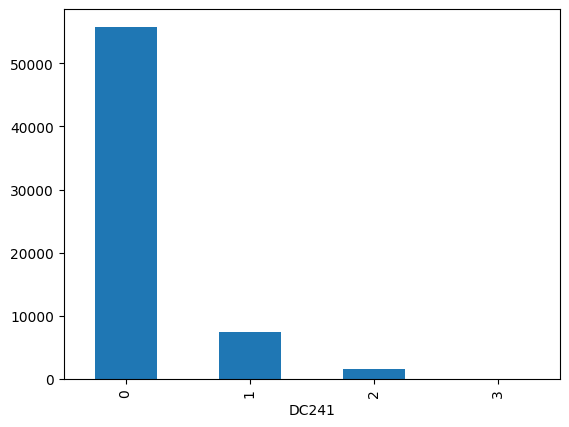

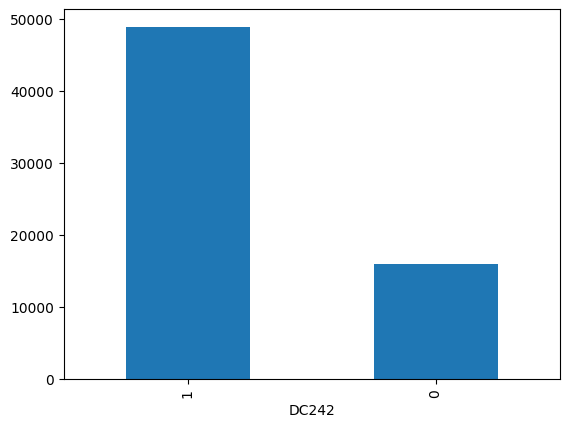

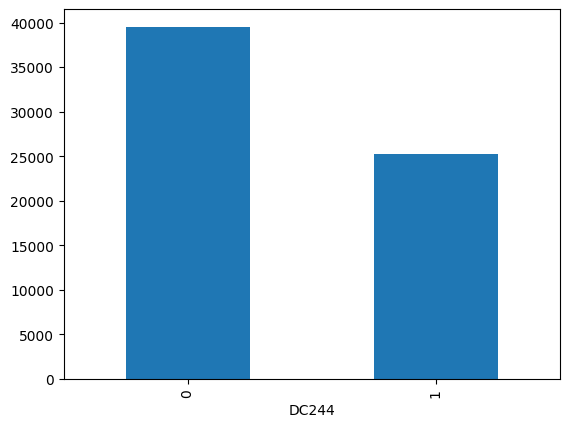

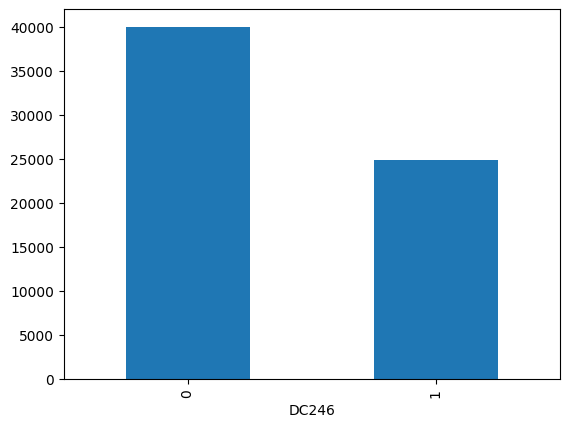

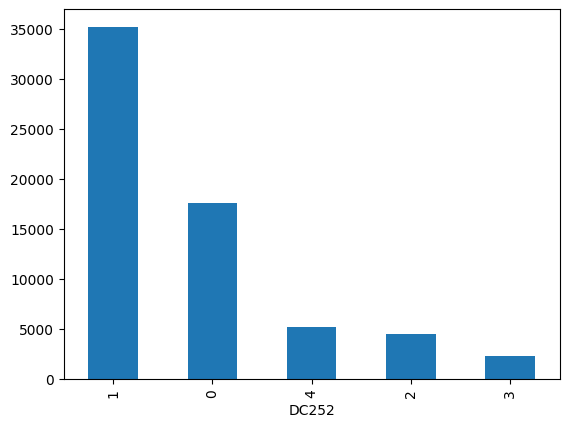

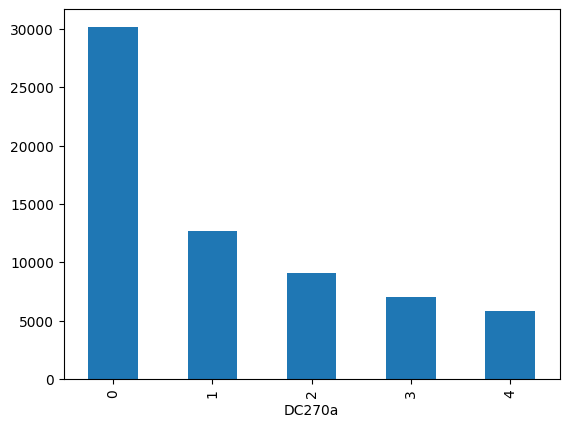

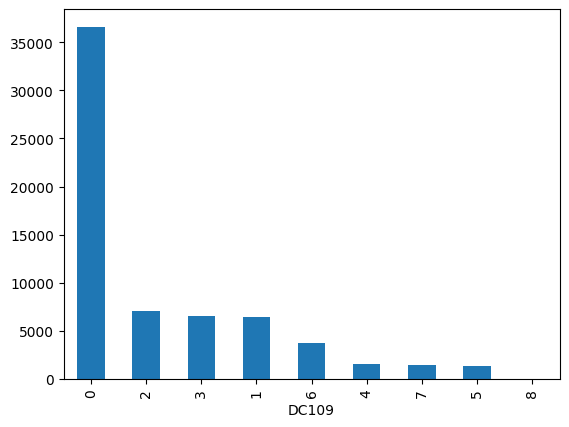

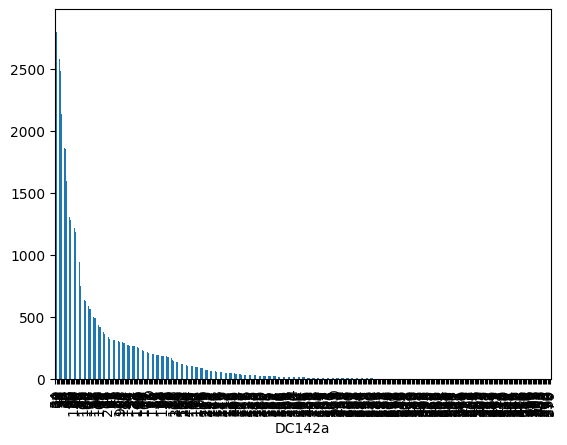

In [29]:
import matplotlib.pyplot as plt

for column in features:
    df_smoted[column].value_counts().plot(kind='bar')
    plt.show()